Assignment 4 <br>
Question 1<br>
A) Parallel Plates. Using thermalradiation.net the configuration factor is 0.4152. This code generally ouputs a factor of 0.41.


F12 = 0.4212


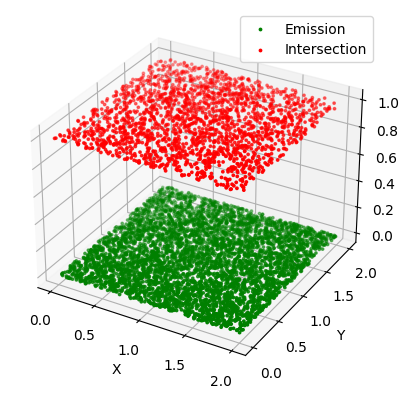

In [1]:
import numpy as np
import radMC as mc
import matplotlib.pyplot as plt

#Plane 1
lx1 = 2
ly1 = 2
lz1 = 0

#Plane 2
p2 = np.array([2.0, 2.0, 1.0])
n2 = np.array([0.0, 0.0, 1.0])
r2 = np.array([[0.0, 2.0], [0.0, 2.0], [1.0, 1.0]])

#Emission Position
nRay = int(5e3)     # Number of rays
ic = 0  # intialize intersection counter
pf = 1  # plotting flag (=1 for plot) 

# Apply tolerance to second surface (needed to ensure intersection is detected)
tol = 1e-12
r2[:,0] = r2[:,0]-tol
r2[:,1] = r2[:,1]+tol

# Initialize vectors for plotting 
pVec = np.empty((0,3),int)
iVec = np.empty((0,3),int)
dVec = np.empty((0,3),int)


for n in range(nRay):
    # Emission position 
    pos = mc.posnX(lx1,ly1,lz1)
    pVec = np.append(pVec,np.array([pos]),axis=0)
    
    # Emission direction 
    dirn = mc.dirn()
    dVec = np.append(dVec,np.array([dirn]),axis=0)
    
    # Calculate intersection with infinte plane
    t = np.dot(n2,(p2-pos)) / (np.dot(n2,dirn))
    
    # Check if intersection is within finite planar geometry 
    
    # position on plane 2
    pi = pos + t*dirn
    
#    Initialize boolean vector 
    b=np.ones(3,dtype=bool)
    
    # Check if point is in x,y,z range of surface 2 
    for i in range(3):
        b[i] = pi[i]>=r2[i,0]  and pi[i]<=r2[i,1]

        
    if b.all(): # If all coords are within finite range of surface 2 - intersection: 
        ic = ic+1
        iVec = np.append(iVec, np.array([pi],),axis=0)


# Calculate view factor
f12 = ic/nRay
print('F12 = {:.4}'.format(f12))
 
# Plotting
if pf == 1:
    plt.close('all')
    plt.clf()
    fig1 = plt.figure(1)
    ax1 = plt.subplot(projection='3d')
    ax1.scatter(pVec[:,0], pVec[:,1], pVec[:,2],
                s=3,color='g',marker='o')
    ax1.scatter(iVec[:,0], iVec[:,1], iVec[:,2],
                s=3,color='r',marker='o')
    
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    
    ax1.legend(['Emission','Intersection'])
    plt.show()
    
    # #      Uncomment to plot emitted rays        
    # ax1.quiver(pVec[:,0], pVec[:,1], pVec[:,2], 
    #       dVec[:,0], dVec[:,1], dVec[:,2], 
    #       length = 0.5,
    #       arrow_length_ratio =0.1,
    #       lw=0.1, color='k')



B) Angled plates. The view factor is calculated as 0.1772
 

[-0.8660254  0.         0.5      ]
F12 = 0.1782


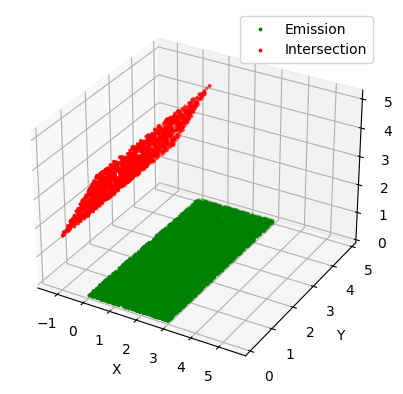

In [13]:
# Angled Planes (acute angles only)----------------------
# Define plane 1
lx1 = 3    #length in x dirn
ly1 = 5    #length in y dirn
lz1 = 0    #length in z dirn



# # Define Plane 2
ang = 60*np.pi/180  # angle separating planes

p2 = np.array([-2*np.cos(ang), 0, 2*np.sin(ang)])  # Point on 2
n2 = np.array([-np.sin(ang), 0.0, np.cos(ang)])  # normal vector for 2
print(n2)
# range of x,y,z for surface 2
r2 = np.array([[-2.0*np.cos(ang), -2.0*np.cos(ang)+3*np.cos(ang)], [0.0, 5.0], 
               [2*np.sin(ang), 2*np.sin(ang)+ 3*np.sin(ang)]])

nRay = int(10e3)     # Number of rays
ic = 0  # intialize intersection counter
pf = 1  # plotting flag (=1 for plot) 

# Apply tolerance to second surface (needed to ensure intersection is detected)
tol = 1e-12
r2[:,0] = r2[:,0]-tol
r2[:,1] = r2[:,1]+tol

# Initialize vectors for plotting 
pVec = np.empty((0,3),int)
iVec = np.empty((0,3),int)
dVec = np.empty((0,3),int)


for n in range(nRay):
    # Emission position 
    pos = mc.posnX(lx1,ly1,lz1)
    pVec = np.append(pVec,np.array([pos]),axis=0)
    
    # Emission direction 
    dirn = mc.dirn()
    dVec = np.append(dVec,np.array([dirn]),axis=0)
    
    # Calculate intersection with infinte plane
    t = np.dot(n2,(p2-pos)) / (np.dot(n2,dirn))
    
    # Check if intersection is within finite planar geometry 
    
    # position on plane 2
    pi = pos + t*dirn
    
#    Initialize boolean vector 
    b=np.ones(3,dtype=bool)
    
    # Check if point is in x,y,z range of surface 2 
    for i in range(3):
        b[i] = pi[i]>=r2[i,0]  and pi[i]<=r2[i,1]

        
    if b.all(): # If all coords are within finite range of surface 2 - intersection: 
        ic = ic+1
        iVec = np.append(iVec, np.array([pi],),axis=0)


# Calculate view factor
f12 = ic/nRay
print('F12 = {:.4}'.format(f12))
 
# Plotting
if pf == 1:
    plt.close('all')
    plt.clf()
    fig1 = plt.figure(1)
    ax1 = plt.subplot(projection='3d')
    ax1.scatter(pVec[:,0], pVec[:,1], pVec[:,2],
                s=3,color='g',marker='o')
    ax1.scatter(iVec[:,0], iVec[:,1], iVec[:,2],
                s=3,color='r',marker='o')
    
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    
    ax1.legend(['Emission','Intersection'])
    ax1.set_xlim([-1.6,5.8])
    ax1.set_ylim([-0.1,5.1])
    ax1.set_zlim([0,5.2])

    plt.show()
    
    # #      Uncomment to plot emitted rays        
    # ax1.quiver(pVec[:,0], pVec[:,1], pVec[:,2], 
    #       dVec[:,0], dVec[:,1], dVec[:,2], 
    #       length = 0.5,
    #       arrow_length_ratio =0.1,
    #       lw=0.1, color='k')

Question 2<br>
Monte Carlo Method


w=1.0 W/ray
N1=7.44e+04 rays
N2=4.901e+04 rays
q1=1.793e+04 W/m2
q2=98.05 W/m2


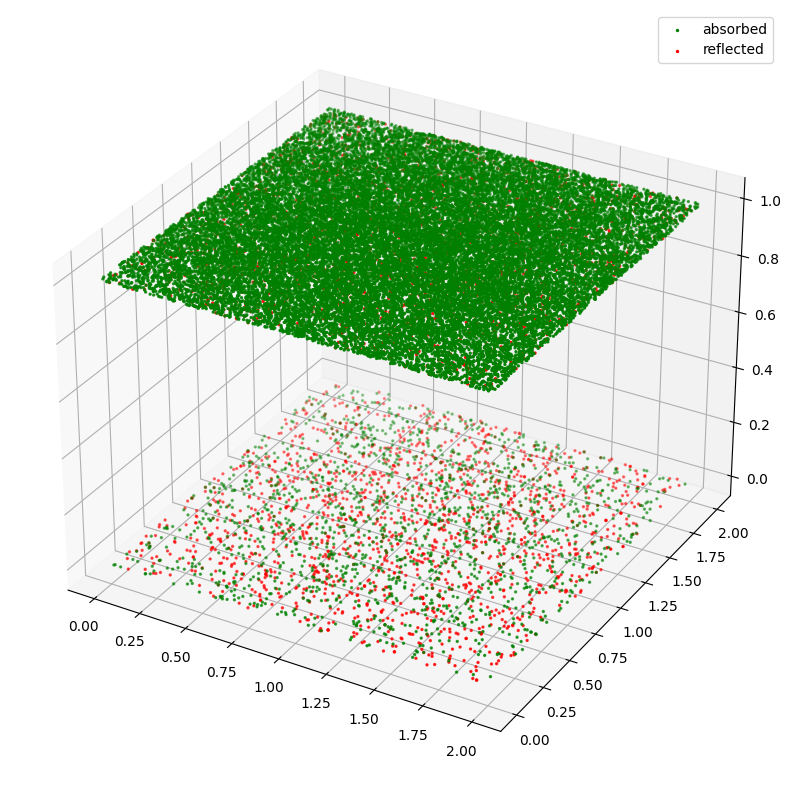

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Sat Mar  7 17:43:05 2020
Use Monte Carlo method to determine RADIATIVE EXCHANGE (net flux)
between two rectangular planes
Geometry is hard coded and defined base on:
    - single point on surfaces 1, 2
    - normal vector for surfaces 1, 2
    - range of x,y,z for surfaces 1, 2
    
    Plotting of emitting/intersecting positions and/or rays is possible by
    uncommenting commands 

@author: pkirchen
"""

import numpy as np
import radMC as mc
import matplotlib.pyplot as plt

# -----------------------------------------------------
# Parallel Unit Planes
# Define plane 1
uVec = [1,1,1]
lx1 = 2.0    #length in x dirn
ly1 = 2.0    #length in y dirn
lz1 = 0    #length in z dirn

p1 = np.array([0,0,0])
n1 = np.array([0,0,1.0])
r1 = np.array([[0.0, 2.0], [0.0,2.0], [0.0,0.0]])
a1 = lx1*ly1
eps1 = 0.5
T1 = 900.0


# Define Plane 2
p2 = np.array([1.0, 1.0, 1.0])  # Point on 2
n2 = np.array([0,0,1.0])  # normal vector for 2
a2 = a1
eps2 = 0.9
T2 = 700.0

# range of x,y,z for surface 2
r2 = np.array([[0.0, 2.0], [0.0, 2.0], [1.0, 1.0]])
# -----------------------------------------------------


# Compile property vectors, define constants
a = np.array([a1,a2])
eps = np.array([eps1, eps2])
T = np.array([T1, T2])
nVec = np.array([n1,n2])
pVec = np.array([p1, p2])
rVec = np.array([r1,r2])

sig = 5.67e-8  # Stefan Boltzmann constant [W/m2/K]

# Define energy packet size
w = 1.0
nRay = np.array(eps*sig*T**4*a/w)

# Initialize intersection counter vector
ic = np.zeros_like(a)
pf = 1  # Plot flag 

# -----------------------------------------------------------------------------
def rayProp(sIdx, rVec, pVec, nVec, pos=None, dirn = None):
    ''' rayProp defines the position and direction of emission (if not provided)
    and checks for intersection with other plane. 
    
    sIdx: surface index [0]:emitter, [1]:incident
    rVec: extext of surface 
    pVec: plane definition point on surfaces
    nVec: normal vector for surfaces
    pos: emission position (default none)
    dirn: emission direction (default none)
    
    '''
    # Define intersection tolerance
    tol = 1e-10
    
    
    # If no position is provided, define
    if pos is None:
        re = rVec[sIdx[0],:,:]
        
        # Generate emission location based on finite dimensions of plane
        pos = mc.posnX(re[0,1]-re[0,0],
                       re[1,1]-re[1,0],
                       re[2,1]-re[2,0])
    
    # If no direction is provided, define
    if dirn is None:
        dirn = mc.dirn()
        
#   Calculate intersection with other surface, check for intersection
    ni = nVec[sIdx[1],:]
    pi = pVec[sIdx[1],:]
    ri = rVec[sIdx[1],:,:]
    t = np.dot(ni,(pi-pos)) / (np.dot(ni,dirn))
    pti = pos + t*dirn   # position on opposite plane
    b=np.ones(3,dtype=bool) #initialize boolean vector 
        
    # Check if point is in x,y,z range of surface 2 
    for i in range(3):
        b[i] = pti[i]>=(ri[i,0]-tol)  and pti[i]<=(ri[i,1]+tol)
    
    if b.all():
        icf = 1
    else:
        icf=0
        
    return icf, pos, pti, dirn, sIdx
#------------------------------------------------------------------------------



# Initialize vectors for eventual ploting (can be commented if plot not used)
paVec = np.empty((0,3),int)
prVec = np.empty((0,3),int)


# Emission from surface 1
for nC1 in range(int(nRay[0].round())):
    
    rf = 1     # Ray flag (1=alive)
    pos = None 
    dirn = None 
    sIdx = [0,1] # surface indcices [0]: emitter; [1]:incident
    
    while rf==1: # until ray misses surface or is absorbed 
        # Generate ray, check for intersection 
        [icf, po, pi, dirn, sIdx] = rayProp(sIdx, rVec, pVec, nVec, pos, dirn)
        if icf ==1: # if intersection 
      
            if np.random.random()<=(eps[sIdx[1]]): #if absorbed
                ic[sIdx[1]] = ic[sIdx[1]] +1
                rf = 0 # this ray is done, break while loop
                
                # store absorption position vector for plotting
                paVec = np.append(paVec,np.array([pi]),axis=0)
                
            else: # ray is reflected (diffusely) reinitialize using incident position 
                sIdx.reverse()  # Make incident surface the emitter and vice versa
                pos = pi
                
                # store relfected position vector for plotting
                prVec = np.append(prVec,np.array([pi]),axis=0)
                
        else: #no intersection, break while loop
            rf = 0

# Emission from surface 2 (same as above, without plotting) 
for nC2 in range(int(nRay[1].round())):
    
    rf = 1     # Ray flag (1=alive)
    pos = None 
    dirn = None 
    sIdx = [0,1] # surface indcices [0]: emitter; [1]:incident
    
    while rf==1:
        [icf, po, pi, dirn, sIdx] = rayProp(sIdx, rVec, pVec, nVec, pos, dirn)
        if icf ==1:
            if np.random.random()<=(eps[sIdx[1]]):
                ic[sIdx[1]] = ic[sIdx[1]] +1
                rf = 0
                
                # # store absorption position vector for plotting
                # paVec = np.append(paVec,np.array([pi]),axis=0)
                
            else:
                sIdx.reverse()
                pos = pi
                
                # # store relfected position vector for plotting
                # prVec = np.append(prVec,np.array([pi]),axis=0)
        else: 
            rf = 0

# Calculate net flux
q1 = (nRay[0]-ic[0])*w/a[0]
q2 = (nRay[1]-ic[1])*w/a[1]

#ax1.legend((pa,pr),('Absorbed', 'Reflected'))
print('w={:.4} W/ray'.format(w))
print('N1={:.4} rays'.format(nRay[0]))
print('N2={:.4} rays'.format(nRay[1]))
print('q1={:.4} W/m2'.format(q1))
print('q2={:.4} W/m2'.format(q2))


plt.close('all')
fig1 = plt.figure(1,figsize=[10,10])
ax1 = plt.subplot(projection='3d')
ax1.scatter(paVec[:,0],paVec[:,1],paVec[:,2],
            s=2,color='g',marker='o',label='absorbed')
ax1.scatter(prVec[:,0],prVec[:,1],prVec[:,2],
            s=2,color='r',marker='o',label='reflected')
ax1.legend()
plt.show()


Radiosity Method

In [12]:
import radiosity as r

a1 = 4
a2 = 4
a3 = 8

f11 = 0
f12 = 0.41
f13 = 1-f12
f21 = a1/a2*f12
f22 = 0
f23 = 1-f21
f31 = a1/a3*f13
f32 = a2/a3*f23
f33 = 1-f31-f32

a = np.array([a1, a2, a3])
f = np.array([[f11, f12, f13], [f21, f22, f23], [f31, f32, f33]])
T = np.array([900.0, 700.0, 0])#must be float
eps  = np.array([0.5, 0.9, 1])

qr = r.rad_encl_q(f,T,eps)
for i in range(qr.size):
    print ('Net flux on surface {:1} = {:.4} W/m^2'.format(i+1,qr[i])) 

Net flux on surface 1 = 1.591e+04 W/m^2
Net flux on surface 2 = 4.396e+03 W/m^2
Net flux on surface 3 = -1.015e+04 W/m^2


These values don't line up, and I can't figure out why. It seems to me they should line up and be the same. <br>
Question 3<br>
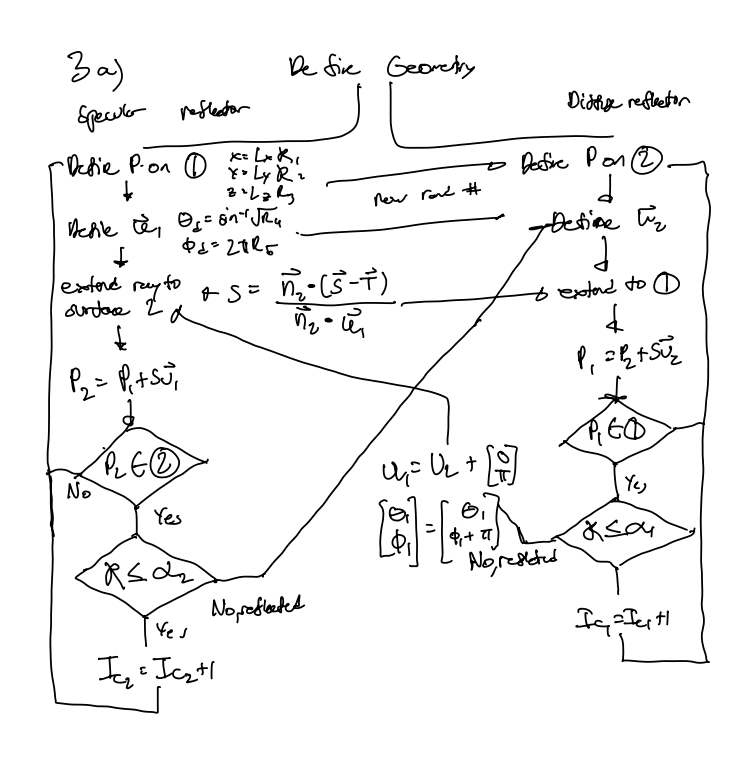
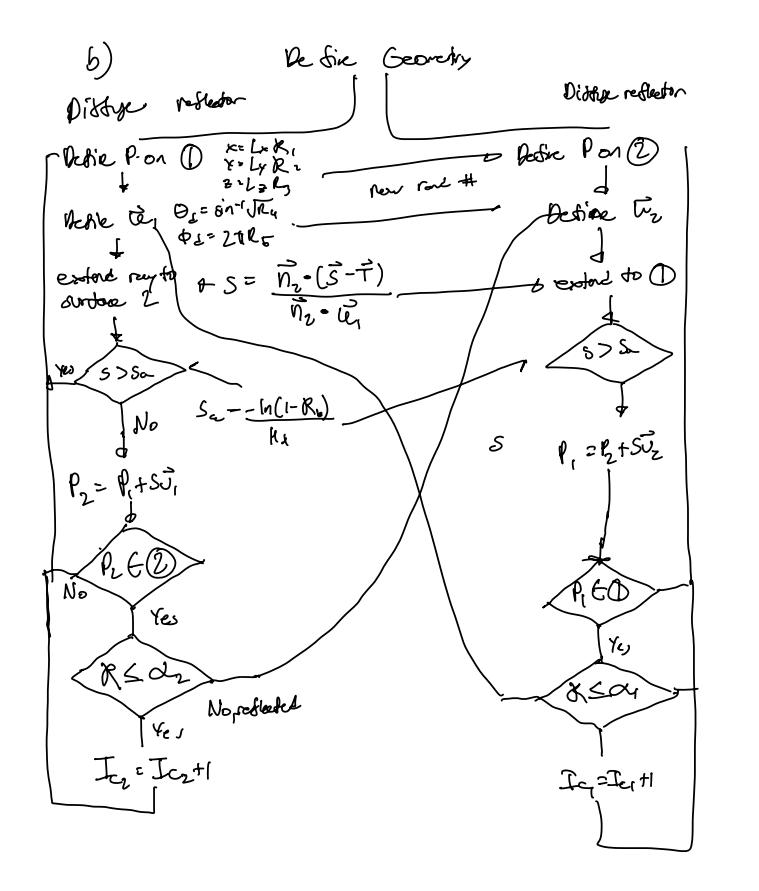
<br>
Appendix
<br>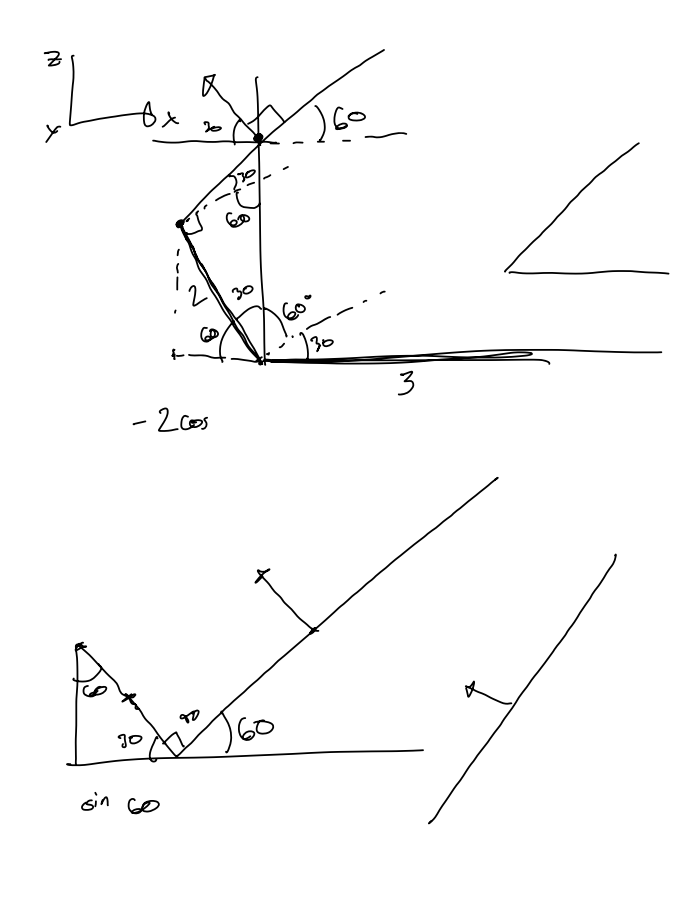